In [1]:
install.packages(c("tidyverse", "skimr", "janitor", "lubridate"))

library(tidyverse)  # Para manipulación de datos y gráficos
library(skimr)      # Para resúmenes estadísticos detallados y visuales
library(janitor)    # Para limpieza de nombres de columnas
library(lubridate)  # Para manejo de fechas

options(scipen = 999) # Evitar notación científica
theme_set(theme_minimal()) # Tema limpio

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
df_vitacart <- read_csv("VitaCart_Dataset_CustomerChurn_2024.csv")

df_vitacart <- df_vitacart |> clean_names()

head(df_vitacart)

Rows: 12500 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): BC001_ID_Cliente, BC003_Genero, BC004_Estado_civil, BC005_Nivel_ed...
dbl (17): BC002_Edad, BC008_Antiguedad_meses, BC012_Banda_valor_RFM, BC014_N...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


bc001_id_cliente,bc002_edad,bc003_genero,bc004_estado_civil,bc005_nivel_educativo,bc006_segmento_socioeconomico,bc007_ciudad_zona,bc008_antiguedad_meses,bc009_canal_captacion,bc010_tipo_cliente,⋯,bc023_dias_desde_ultima_compra,bc024_tiempo_medio_entrega_dias,bc025_retrasos_entrega_num,bc026_incidencias_registradas_num,bc027_contactos_atencion_num,bc028_satisfaccion_entregas,bc029_satisfaccion_plataforma,bc030_estado_cliente,bc031_tipo_abandono,bc032_razon_abandono
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
VC000001,45,Femenino,Divorciado/a,1,Alto,Valencia,67,Referral,No suscripción,⋯,38,4,0,0,0,3,3,Activo,<no informado>,<no informado>
VC000002,37,Masculino,Casado/a,2,Bajo,Madrid,44,Orgánico,No suscripción,⋯,8,2,1,2,3,3,4,Activo,<no informado>,<no informado>
VC000003,47,Femenino,Casado/a,3,Medio,Madrid,32,Ads,No suscripción,⋯,246,3,0,0,0,2,4,Inactivo,Voluntario,Experiencia logística
VC000004,57,Masculino,Soltero/a,2,Medio,Valencia,48,Ads,No suscripción,⋯,3,2,0,2,2,4,4,Activo,<no informado>,<no informado>
VC000005,36,Femenino,Divorciado/a,2,Medio,Valencia,43,Marketplace,No suscripción,⋯,27,2,2,2,3,3,4,Activo,<no informado>,<no informado>
VC000006,36,Femenino,Soltero/a,4,Bajo,Valencia,25,Ads,No suscripción,⋯,31,3,1,0,2,2,4,Activo,<no informado>,<no informado>


In [3]:
str(df_vitacart)

spc_tbl_ [12,500 × 32] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ bc001_id_cliente                 : chr [1:12500] "VC000001" "VC000002" "VC000003" "VC000004" ...
 $ bc002_edad                       : num [1:12500] 45 37 47 57 36 36 58 48 33 46 ...
 $ bc003_genero                     : chr [1:12500] "Femenino" "Masculino" "Femenino" "Masculino" ...
 $ bc004_estado_civil               : chr [1:12500] "Divorciado/a" "Casado/a" "Casado/a" "Soltero/a" ...
 $ bc005_nivel_educativo            : chr [1:12500] "1" "2" "3" "2" ...
 $ bc006_segmento_socioeconomico    : chr [1:12500] "Alto" "Bajo" "Medio" "Medio" ...
 $ bc007_ciudad_zona                : chr [1:12500] "Valencia" "Madrid" "Madrid" "Valencia" ...
 $ bc008_antiguedad_meses           : num [1:12500] 67 44 32 48 43 25 22 49 30 26 ...
 $ bc009_canal_captacion            : chr [1:12500] "Referral" "Orgánico" "Ads" "Ads" ...
 $ bc010_tipo_cliente               : chr [1:12500] "No suscripción" "No suscripción" "No suscripción" "No suscrip

In [4]:
sum(is.na(df_vitacart))
sum(duplicated(df_vitacart))

[1] 1769

[1] 0

In [5]:
summary(df_vitacart)

 bc001_id_cliente     bc002_edad    bc003_genero       bc004_estado_civil
 Length:12500       Min.   :18.00   Length:12500       Length:12500      
 Class :character   1st Qu.:31.00   Class :character   Class :character  
 Mode  :character   Median :39.00   Mode  :character   Mode  :character  
                    Mean   :39.15                                        
                    3rd Qu.:47.00                                        
                    Max.   :80.00                                        
                                                                         
 bc005_nivel_educativo bc006_segmento_socioeconomico bc007_ciudad_zona 
 Length:12500          Length:12500                  Length:12500      
 Class :character      Class :character              Class :character  
 Mode  :character      Mode  :character              Mode  :character  
                                                                       
                                                

In [6]:
resumen_skim <- skim(df_vitacart)
print(resumen_skim)

── Data Summary ────────────────────────
                           Values     
Name                       df_vitacart
Number of rows             12500      
Number of columns          32         
_______________________               
Column type frequency:                
  character                15         
  numeric                  17         
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
   skim_variable                 n_missing complete_rate min max empty n_unique
 1 bc001_id_cliente                      0         1       8   8     0    12500
 2 bc003_genero                          0         1       8  19     0        4
 3 bc004_estado_civil                  389         0.969   7  15     0        6
 4 bc005_nivel_educativo               498         0.960   1  14     0        6
 5 bc006_segmento_socioeconomico       274         0.978   4  14     0        4
 6 bc00

In [7]:
df_categorical <- df_vitacart |>
  select(where(is.character) | where(is.factor))

In [8]:
map(df_categorical, unique)

$bc001_id_cliente
    [1] "VC000001" "VC000002" "VC000003" "VC000004" "VC000005" "VC000006"
    [7] "VC000007" "VC000008" "VC000009" "VC000010" "VC000011" "VC000012"
   [13] "VC000013" "VC000014" "VC000015" "VC000016" "VC000017" "VC000018"
   [19] "VC000019" "VC000020" "VC000021" "VC000022" "VC000023" "VC000024"
   [25] "VC000025" "VC000026" "VC000027" "VC000028" "VC000029" "VC000030"
   [31] "VC000031" "VC000032" "VC000033" "VC000034" "VC000035" "VC000036"
   [37] "VC000037" "VC000038" "VC000039" "VC000040" "VC000041" "VC000042"
   [43] "VC000043" "VC000044" "VC000045" "VC000046" "VC000047" "VC000048"
   [49] "VC000049" "VC000050" "VC000051" "VC000052" "VC000053" "VC000054"
   [55] "VC000055" "VC000056" "VC000057" "VC000058" "VC000059" "VC000060"
   [61] "VC000061" "VC000062" "VC000063" "VC000064" "VC000065" "VC000066"
   [67] "VC000067" "VC000068" "VC000069" "VC000070" "VC000071" "VC000072"
   [73] "VC000073" "VC000074" "VC000075" "VC000076" "VC000077" "VC000078"
   [79] "VC000079" "VC000080" "VC000081" "VC000082" "VC000083" "VC000084"
   [85] "VC000085" "VC000086" "VC000087" "VC000088" "VC000089" "VC000090"
   [91] "VC000091" "VC000092" "VC000093" "VC000094" "VC000095" "VC000096"
   [97] "VC000097" "VC000098" "VC000099" "VC000100" "VC000101" "VC000102"
  [103] "VC000103" "VC000104" "VC000105" "VC000106" "VC000107" "VC000108"
  [109] "VC000109" "VC000110" "VC000111" "VC000112" "VC000113" "VC000114"
  [115] "VC000115" "VC000116" "VC000117" "VC000118" "VC000119" "VC000120"
  [121] "VC000121" "VC000122" "VC000123" "VC000124" "VC000125" "VC000126"
  [127] "VC000127" "VC000128" "VC000129" "VC000130" "VC000131" "VC000132"
  [133] "VC000133" "VC000134" "VC000135" "VC000136" "VC000137" "VC000138"
  [139] "VC000139" "VC000140" "VC000141" "VC000142" "VC000143" "VC000144"
  [145] "VC000145" "VC000146" "VC000147" "VC000148" "VC000149" "VC000150"
  [151] "VC000151" "VC000152" "VC000153" "VC000154" "VC000155" "VC000156"
  [157] "VC000157" "VC000158" "VC000159" "VC000160" "VC000161" "VC000162"
  [163] "VC000163" "VC000164" "VC000165" "VC000166" "VC000167" "VC000168"
  [169] "VC000169" "VC000170" "VC000171" "VC000172" "VC000173" "VC000174"
  [175] "VC000175" "VC000176" "VC000177" "VC000178" "VC000179" "VC000180"
  [181] "VC000181" "VC000182" "VC000183" "VC000184" "VC000185" "VC000186"
  [187] "VC000187" "VC000188" "VC000189" "VC000190" "VC000191" "VC000192"
  [193] "VC000193" "VC000194" "VC000195" "VC000196" "VC000197" "VC000198"
  [199] "VC000199" "VC000200" "VC000201" "VC000202" "VC000203" "VC000204"
  [205] "VC000205" "VC000206" "VC000207" "VC000208" "VC000209" "VC000210"
  [211] "VC000211" "VC000212" "VC000213" "VC000214" "VC000215" "VC000216"
  [217] "VC000217" "VC000218" "VC000219" "VC000220" "VC000221" "VC000222"
  [223] "VC000223" "VC000224" "VC000225" "VC000226" "VC000227" "VC000228"
  [229] "VC000229" "VC000230" "VC000231" "VC000232" "VC000233" "VC000234"
  [235] "VC000235" "VC000236" "VC000237" "VC000238" "VC000239" "VC000240"
  [241] "VC000241" "VC000242" "VC000243" "VC000244" "VC000245" "VC000246"
  [247] "VC000247" "VC000248" "VC000249" "VC000250" "VC000251" "VC000252"
  [253] "VC000253" "VC000254" "VC000255" "VC000256" "VC000257" "VC000258"
  [259] "VC000259" "VC000260" "VC000261" "VC000262" "VC000263" "VC000264"
  [265] "VC000265" "VC000266" "VC000267" "VC000268" "VC000269" "VC000270"
  [271] "VC000271" "VC000272" "VC000273" "VC000274" "VC000275" "VC000276"
  [277] "VC000277" "VC000278" "VC000279" "VC000280" "VC000281" "VC000282"
  [283] "VC000283" "VC000284" "VC000285" "VC000286" "VC000287" "VC000288"
  [289] "VC000289" "VC000290" "VC000291" "VC000292" "VC000293" "VC000294"
  [295] "VC000295" "VC000296" "VC000297" "VC000298" "VC000299" "VC000300"
  [301] "VC000301" "VC000302" "VC000303" "VC000304" "VC000305" "VC000306"
  [307] "VC000307" "VC000308" "VC000309" "VC000310" "VC000311" "VC000312"
  [313] "VC000313" "VC000314" "VC000315" "VC000316" "VC000317" "VC000318"
  [319] "VC000319" "VC000320" "VC000321" "VC000322" "VC00032

In [13]:
# --- CELDA: LIMPIEZA DE DATOS (Data Wrangling) ---

library(tidyverse)
library(stringr) # Para manejo avanzado de texto

# Creamos un nuevo objeto para no machacar el original por si acaso
df_clean <- df_vitacart %>%
  
  # 1. CORRECCIÓN DE TEXTOS Y CATEGORÍAS (String Manipulation)
  mutate(
    # --- A. Unificación de Ciudades ---
    # Convertimos todo a minúsculas temporalmente para buscar patrones
    bc007_ciudad_zona = case_when(
      str_detect(str_to_lower(bc007_ciudad_zona), "val") ~ "Valencia",
      str_detect(str_to_lower(bc007_ciudad_zona), "mad") ~ "Madrid",
      str_detect(str_to_lower(bc007_ciudad_zona), "bar|bcn|barna") ~ "Barcelona",
      TRUE ~ str_to_title(bc007_ciudad_zona) # El resto, primera letra mayúscula
    ),
    
    # --- B. Unificación de Categorías de Productos ---
    # Primero arreglamos mayúsculas/minúsculas (Hogar = hogar)
    bc017_categoria_principal = str_to_title(bc017_categoria_principal),
    # Luego arreglamos sinónimos y erratas
    bc017_categoria_principal = case_when(
      bc017_categoria_principal %in% c("Bebes") ~ "Bebés",
      str_detect(bc017_categoria_principal, "Mascot") ~ "Mascotas", # Mascota y Mascotas
      str_detect(bc017_categoria_principal, "Cuidado") ~ "Cuidado Personal", # CuidadoPers, Cuidado Pers.
      TRUE ~ bc017_categoria_principal
    ),
    
    # --- C. Estado Civil y Educativo (Limpieza de Nulos) ---
    # Convertimos los NA explícitos y los "<no informado>" en una sola categoría "Desconocido"
    bc004_estado_civil = if_else(is.na(bc004_estado_civil) | bc004_estado_civil == "<no informado>", 
                                 "Desconocido", bc004_estado_civil),
    
    bc005_nivel_educativo = if_else(is.na(bc005_nivel_educativo) | bc005_nivel_educativo == "<no informado>", 
                                    "Desconocido", bc005_nivel_educativo),
    
    bc006_segmento_socioeconomico = if_else(is.na(bc006_segmento_socioeconomico) | bc006_segmento_socioeconomico == "<no informado>", 
                                            "Desconocido", bc006_segmento_socioeconomico)
  ) %>%
  
  # 2. CORRECCIÓN DE VALORES NUMÉRICOS (Outliers y Errores Lógicos)
  mutate(
    # --- D. Días desde última compra ---
    # Corregir negativos: Si es < 0, poner 0.
    # Corregir outliers extremos: Si es 999 (código típico de error), poner NA o la media. 
    # Decisión: Ponemos NA para no sesgar la media real.
    bc023_dias_desde_ultima_compra = case_when(
      bc023_dias_desde_ultima_compra < 0 ~ 0,
      bc023_dias_desde_ultima_compra == 999 ~ NA_real_,
      TRUE ~ bc023_dias_desde_ultima_compra
    ),
    
    # --- E. Imputación de Satisfacción (Opcional pero recomendada) ---
    # Los NAs en satisfacción suelen ser porque el cliente no contestó. 
    # Una práctica común es rellenar con la Mediana (neutral) para no perder la fila.
    bc028_satisfaccion_entregas = replace_na(bc028_satisfaccion_entregas, median(bc028_satisfaccion_entregas, na.rm = TRUE)),
    bc029_satisfaccion_plataforma = replace_na(bc029_satisfaccion_plataforma, median(bc029_satisfaccion_plataforma, na.rm = TRUE))
  )

# 3. VERIFICACIÓN: Comprobamos que los cambios han funcionado
print("--- Ciudades Unificadas ---")
table(df_clean$bc007_ciudad_zona)

print("--- Categorías Unificadas ---")
table(df_clean$bc017_categoria_principal)

print("--- Revisión de Nulos Restantes ---")
# Debería haber reducido drásticamente los NAs en demográficos
colSums(is.na(df_clean))

[1] "--- Ciudades Unificadas ---"



Barcelona    Madrid  Valencia 
     5300      4714      2486 

[1] "--- Categorías Unificadas ---"



    Alimentacion     Alimentación            Bebés Cuidado Personal 
             121             2451             1197             2750 
           Hogar         Mascotas            Otros 
            3282             1445             1254 

[1] "--- Revisión de Nulos Restantes ---"


bc001_id_cliente                        bc002_edad 
                                0                                 0 
                     bc003_genero                bc004_estado_civil 
                                0                                 0 
            bc005_nivel_educativo     bc006_segmento_socioeconomico 
                                0                                 0 
                bc007_ciudad_zona            bc008_antiguedad_meses 
                                0                                 0 
            bc009_canal_captacion                bc010_tipo_cliente 
                                0                                 0 
                       bc011_plan             bc012_banda_valor_rfm 
                                0                                 0 
          bc013_frecuencia_compra            bc014_num_pedidos_2024 
                                0                                 0 
           bc015_ticket_medio_eur        bc016_gasto_total_2024_eur 
                                0                                 0 
        bc017_categoria_principal         bc018_variedad_categorias 
                                0                                 0 
      bc019_pct_pedidos_descuento        bc020_intensidad_descuento 
                                0                                 0 
                bc021_metodo_pago    bc022_renovaciones_suscripcion 
                              112                                 0 
   bc023_dias_desde_ultima_compra   bc024_tiempo_medio_entrega_dias 
                               43                                 0 
       bc025_retrasos_entrega_num bc026_incidencias_registradas_num 
                                0                                 0 
     bc027_contactos_atencion_num       bc028_satisfaccion_entregas 
                                0                                 0 
    bc029_satisfaccion_plataforma              bc030_estado_cliente 
                                0                                 0 
              bc031_tipo_abandono              bc032_razon_abandono 
                                0                                 0

In [14]:
# --- CELDA: REFINAMIENTO FINAL DE LIMPIEZA ---

df_clean <- df_clean %>%
  mutate(
    # 1. CORREGIR EL ÚLTIMO TYPO (Alimentacion -> Alimentación)
    bc017_categoria_principal = if_else(bc017_categoria_principal == "Alimentacion", 
                                        "Alimentación", 
                                        bc017_categoria_principal),
    
    # 2. IMPUTAR NULOS RESTANTES
    # Método de pago: Rellenamos los vacíos con "Desconocido"
    bc021_metodo_pago = replace_na(bc021_metodo_pago, "Desconocido"),
    
    # Días desde última compra: Los que eran 999 (ahora NA) los rellenamos con la Mediana
    # Usamos la mediana para no afectar al promedio general
    bc023_dias_desde_ultima_compra = replace_na(bc023_dias_desde_ultima_compra, 
                                                median(bc023_dias_desde_ultima_compra, na.rm = TRUE))
  )

# --- VERIFICACIÓN FINAL ---
print("--- Categorías Definitivas (Ahora sí unificadas) ---")
table(df_clean$bc017_categoria_principal)

print("--- Comprobación de Nulos (Debe dar todo 0) ---")
# Si la suma es 0, el dataset está impoluto
sum(is.na(df_clean))

[1] "--- Categorías Definitivas (Ahora sí unificadas) ---"



    Alimentación            Bebés Cuidado Personal            Hogar 
            2572             1197             2750             3282 
        Mascotas            Otros 
            1445             1254 

[1] "--- Comprobación de Nulos (Debe dar todo 0) ---"


[1] 0

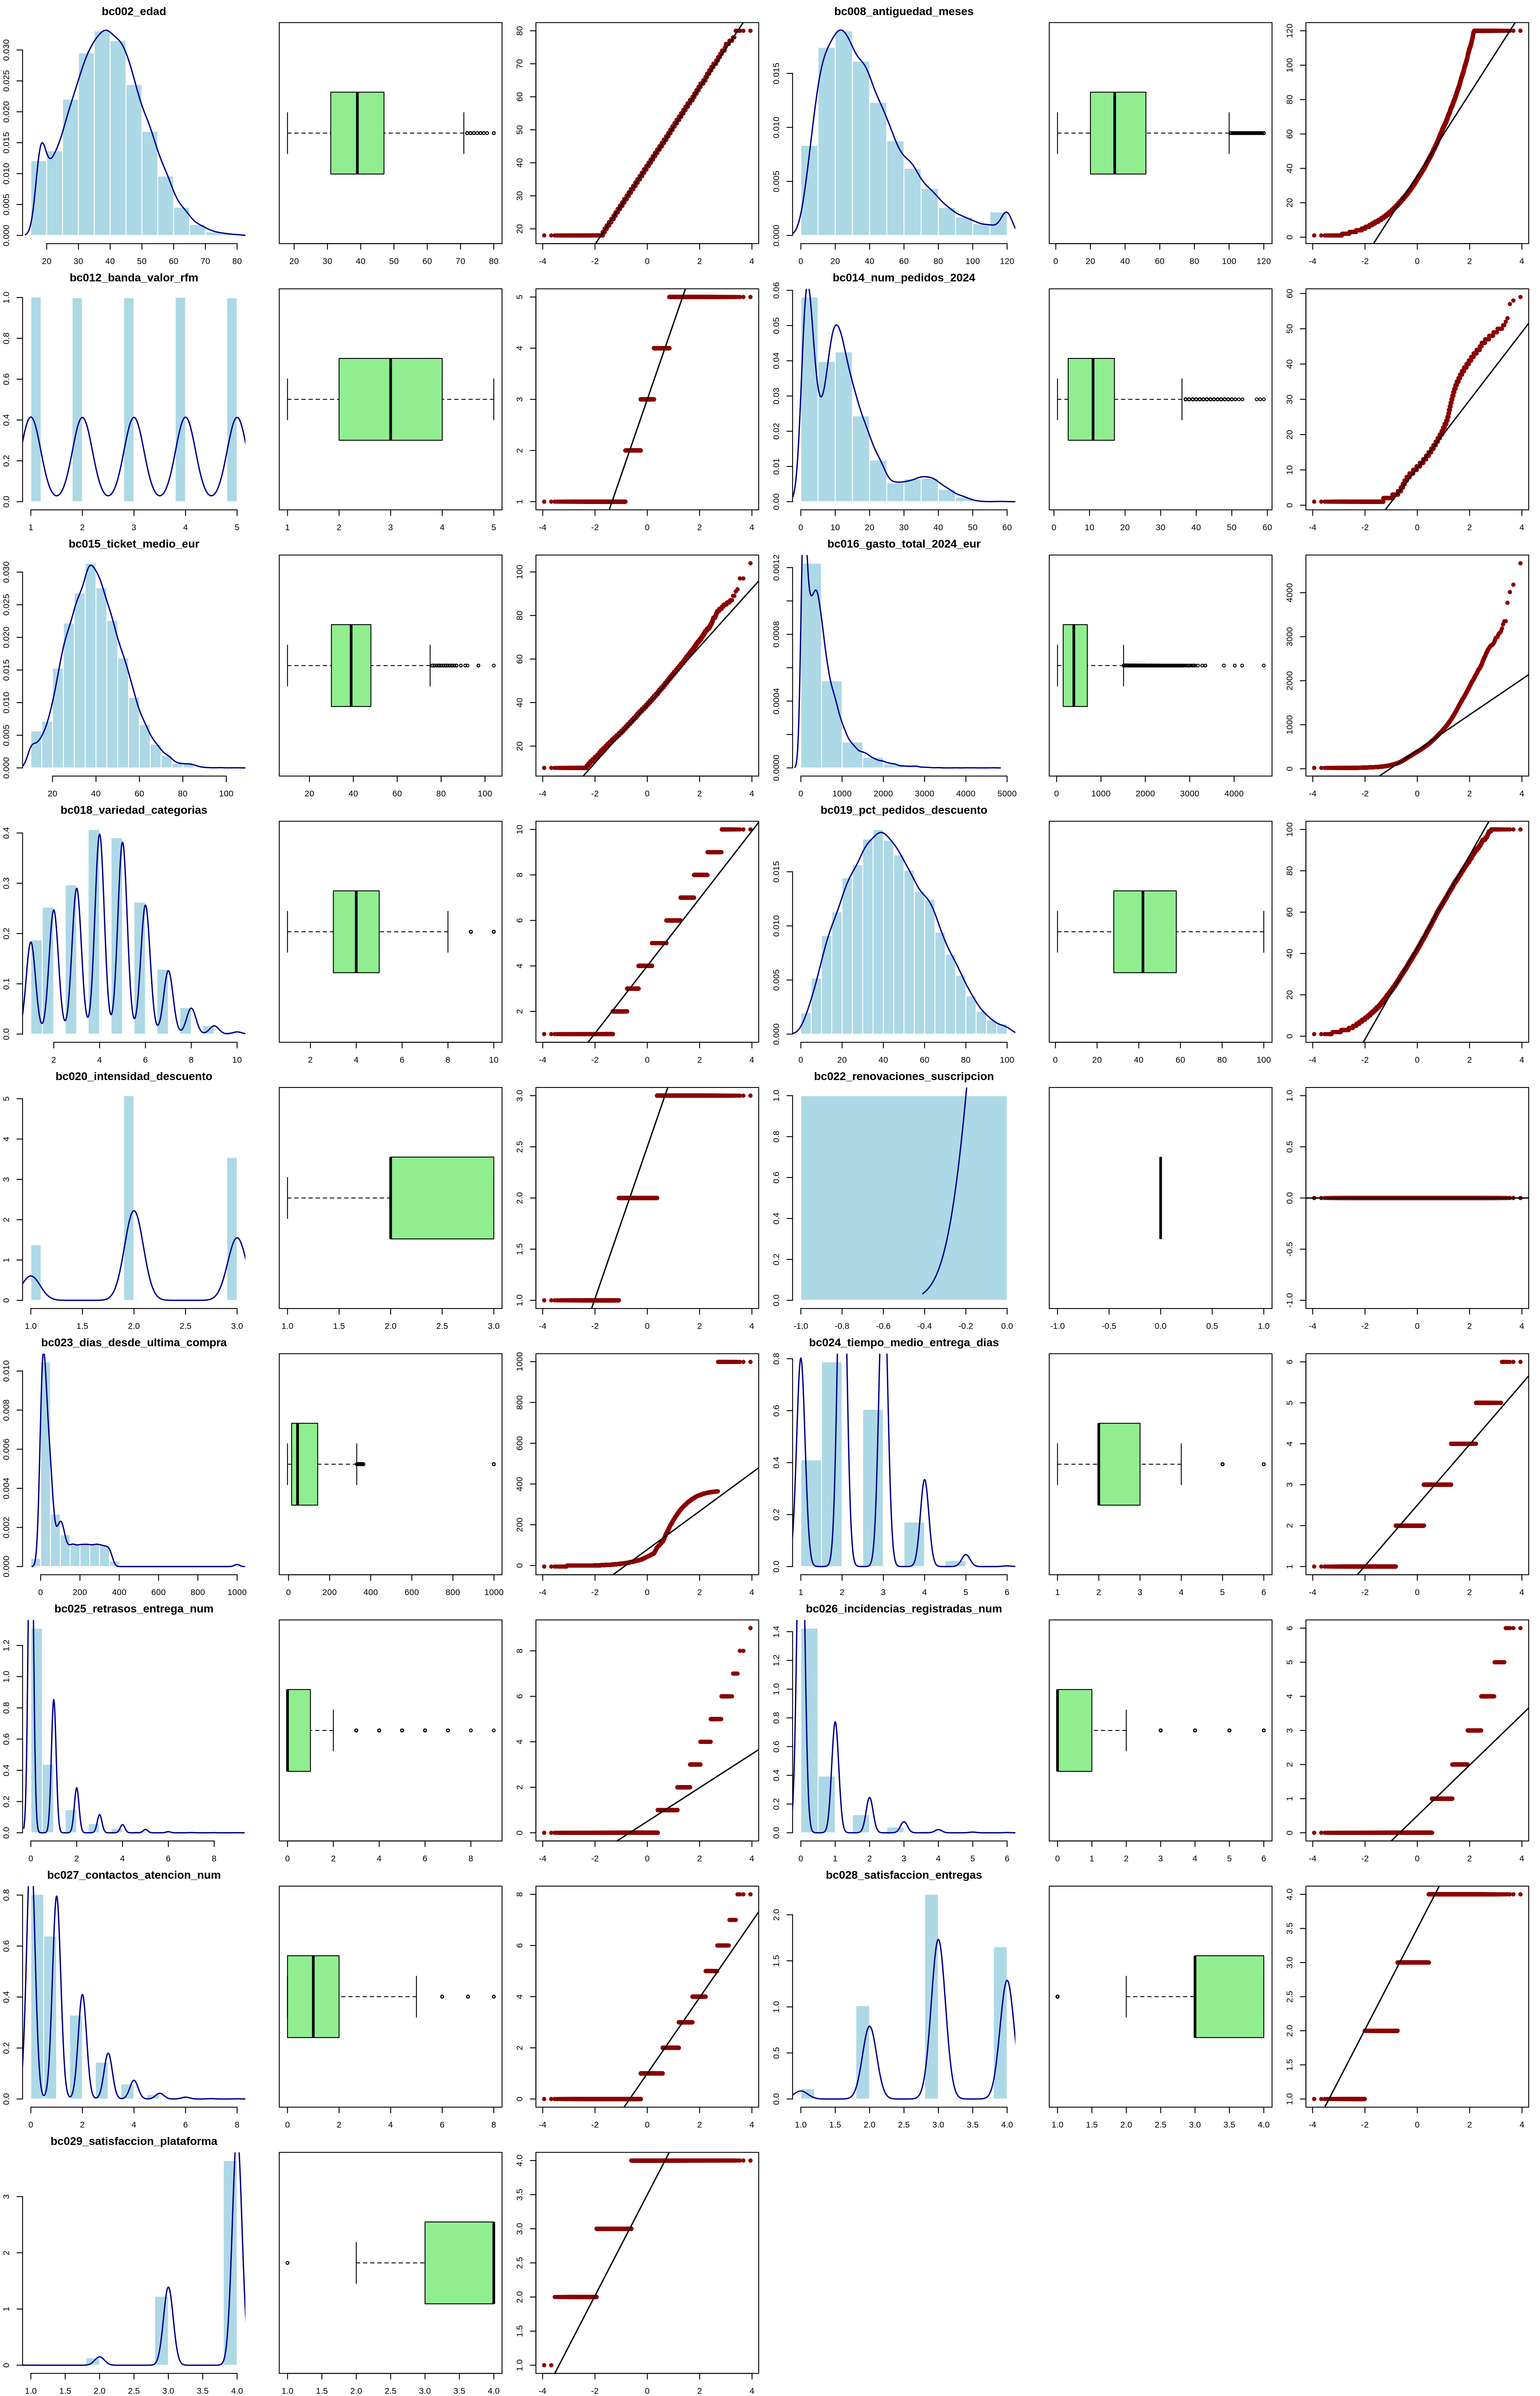

In [12]:
options(repr.plot.width = 18, repr.plot.height = 28, repr.plot.res = 300)

# Convertimos a data.frame para que funcione el indexado [, i] del bucle
datos_num <- as.data.frame(df_vitacart)[sapply(df_vitacart, is.numeric)]
n_vars <- ncol(datos_num)

# Configuración de la rejilla (7 filas, 6 columnas)
# Esto acomoda hasta 14 variables (3 gráficos por variable)
par(mfrow = c(9, 6))

par(mar = c(2, 2, 2, 1))
par(cex.main = 1.2, cex.axis = 0.9)

for (i in seq_len(n_vars)) {
  var_data <- datos_num[, i]
  var_name <- names(datos_num)[i]

  # 1. Histograma
  hist(var_data,
    main = var_name,
    xlab = "",
    col = "lightblue",
    border = "white",
    freq = FALSE
  )
  try(lines(density(var_data, na.rm = TRUE),
    col = "darkblue", lwd = 1.5
  ), silent = TRUE)

  # 2. Boxplot
  boxplot(var_data,
    main = "",
    horizontal = TRUE,
    col = "lightgreen",
    notch = FALSE
  )

  # 3. QQ-Plot
  qqnorm(var_data,
    main = "",
    col = "darkred",
    pch = 19,
    cex = 0.8
  )
  qqline(var_data, col = "black", lwd = 1.5)
}

# Restaurar configuración original
par(mfrow = c(1, 1))
options(repr.plot.width = 18, repr.plot.height = 12)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




[1] "--- KPI PRINCIPAL: Estado de la Base de Clientes ---"
# A tibble: 2 × 5
  bc030_estado_cliente     n total porcentaje label
  <chr>                <int> <int>      <dbl> <chr>
1 Activo                8693 12500      0.695 69.5%
2 Inactivo              3807 12500      0.305 30.5%
[1] "--- Ranking de Abandono por Categoría ---"
# A tibble: 6 × 4
# Groups:   bc017_categoria_principal [6]
  bc017_categoria_principal bc030_estado_cliente count   pct
  <chr>                     <chr>                <int> <dbl>
1 Hogar                     Inactivo              1019 0.310
2 Bebés                     Inactivo               368 0.307
3 Cuidado Personal          Inactivo               841 0.306
4 Alimentación              Inactivo               785 0.305
5 Mascotas                  Inactivo               439 0.304
6 Otros                     Inactivo               355 0.283


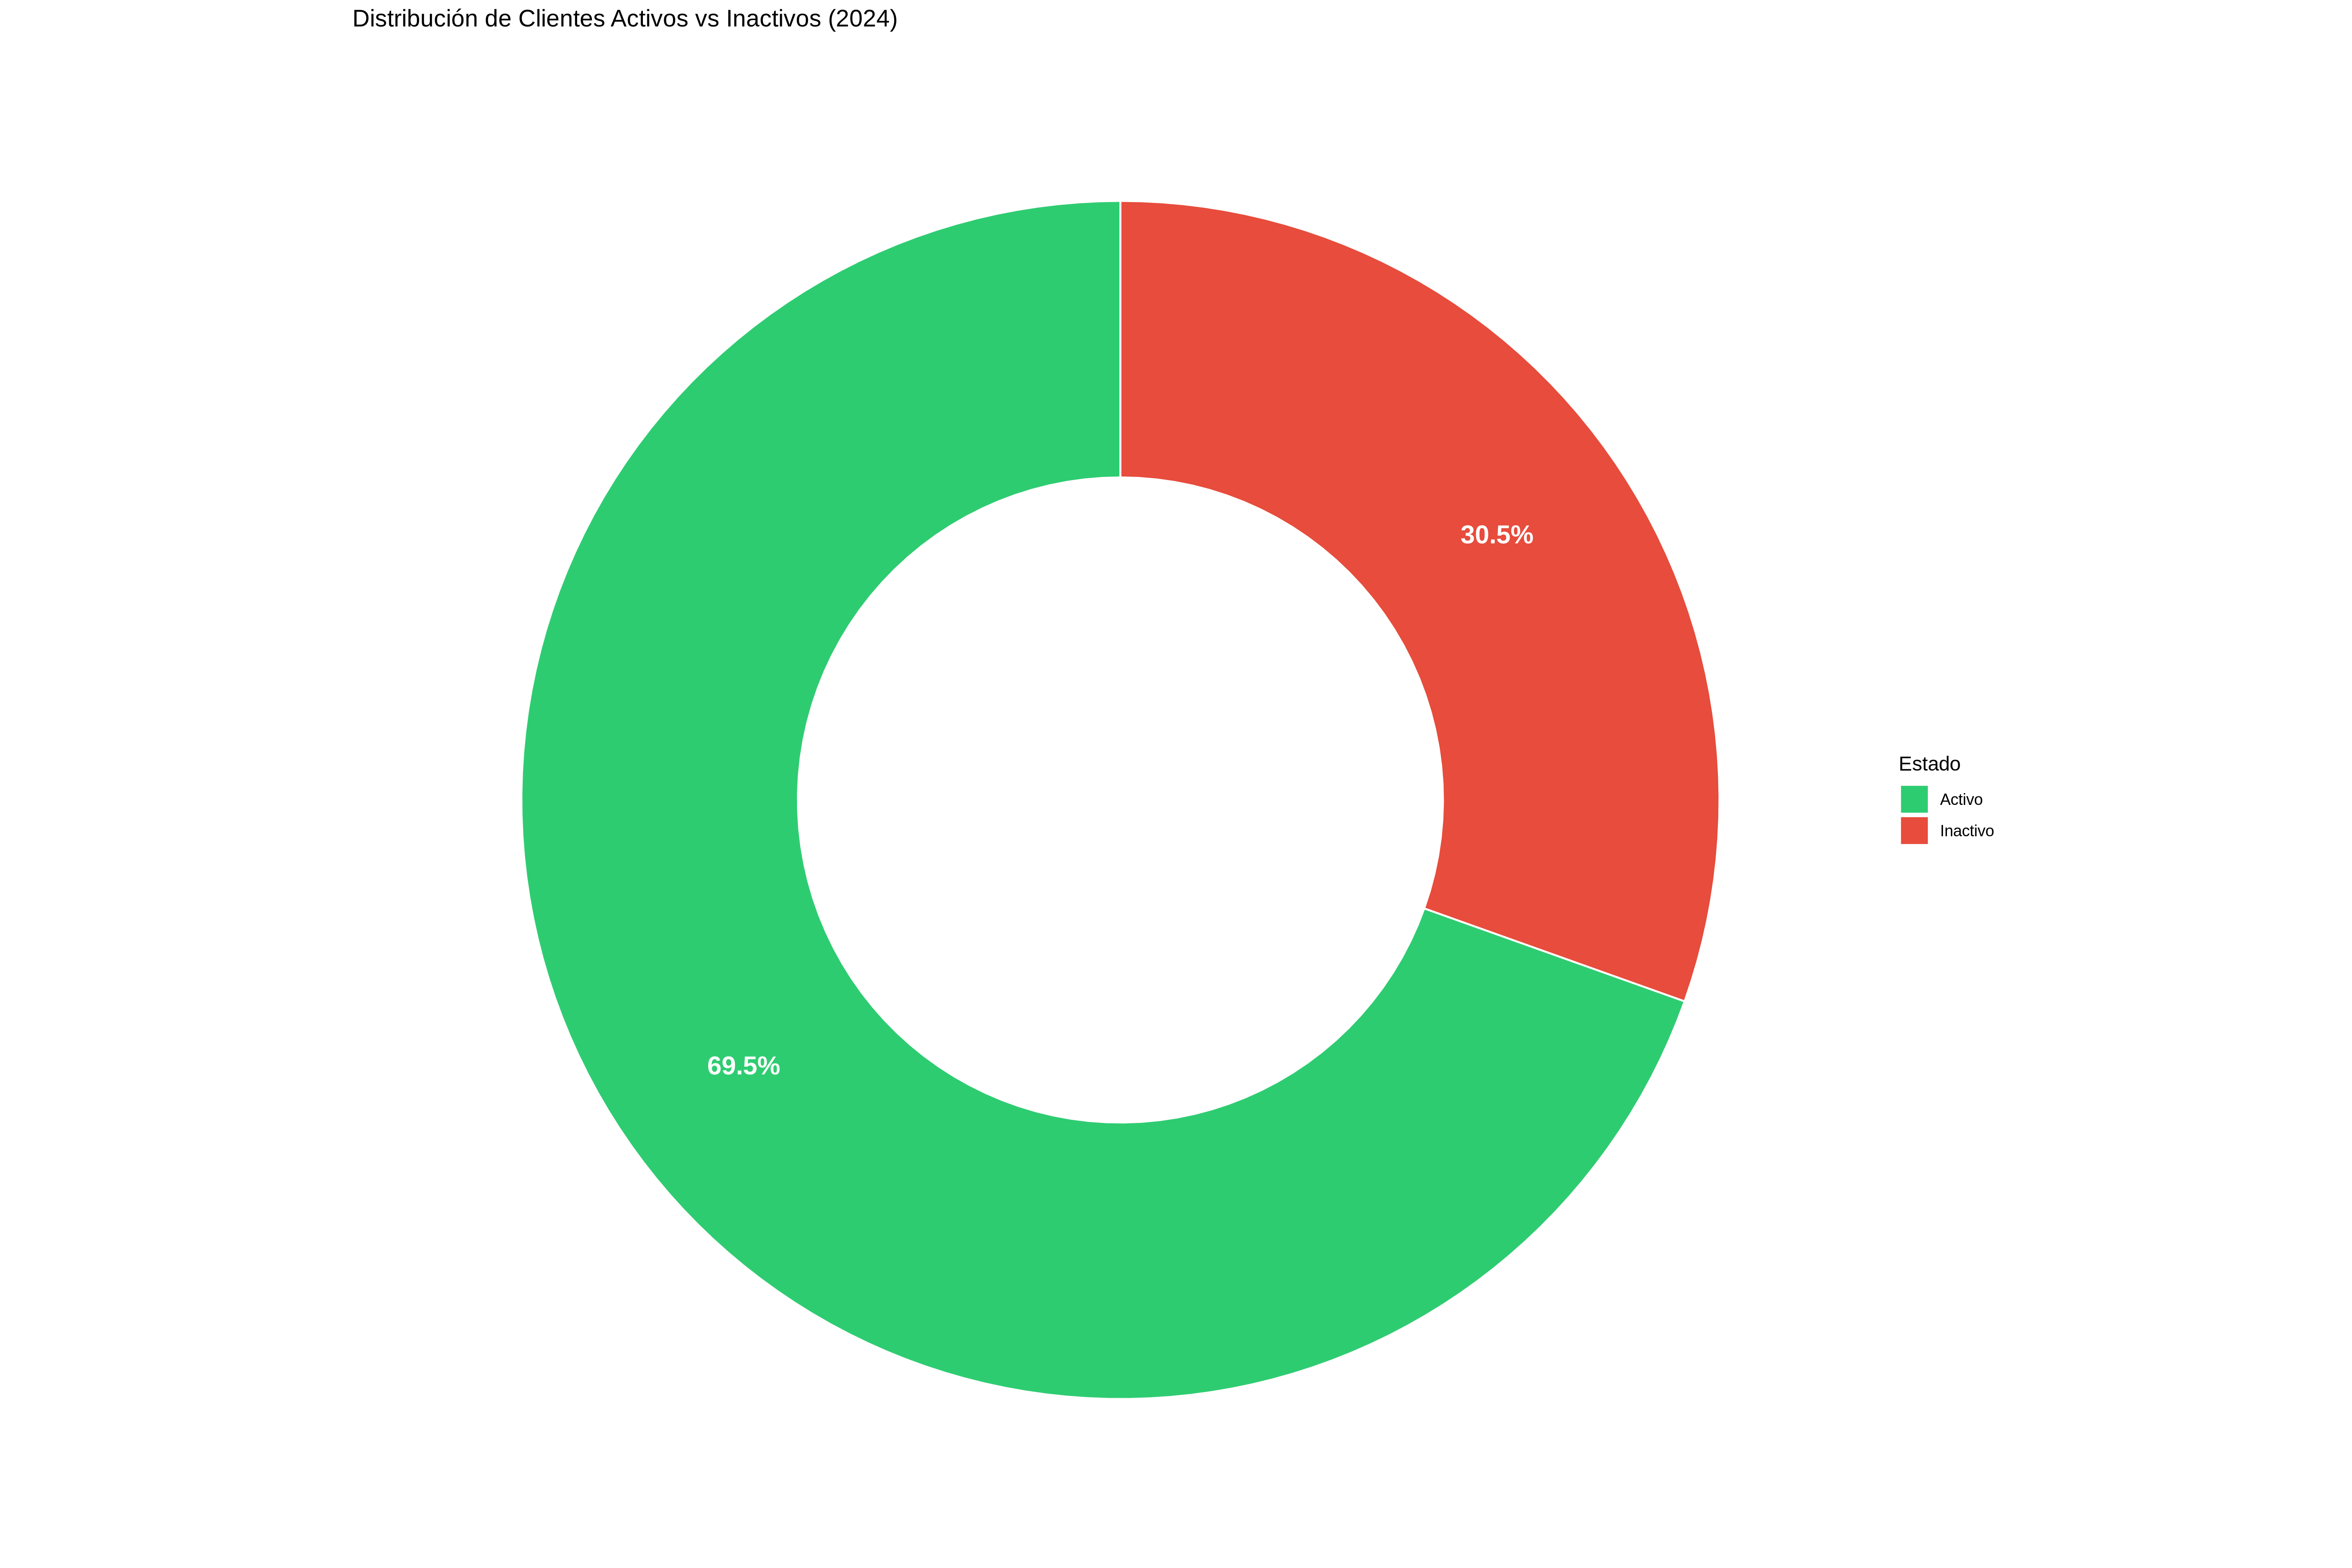

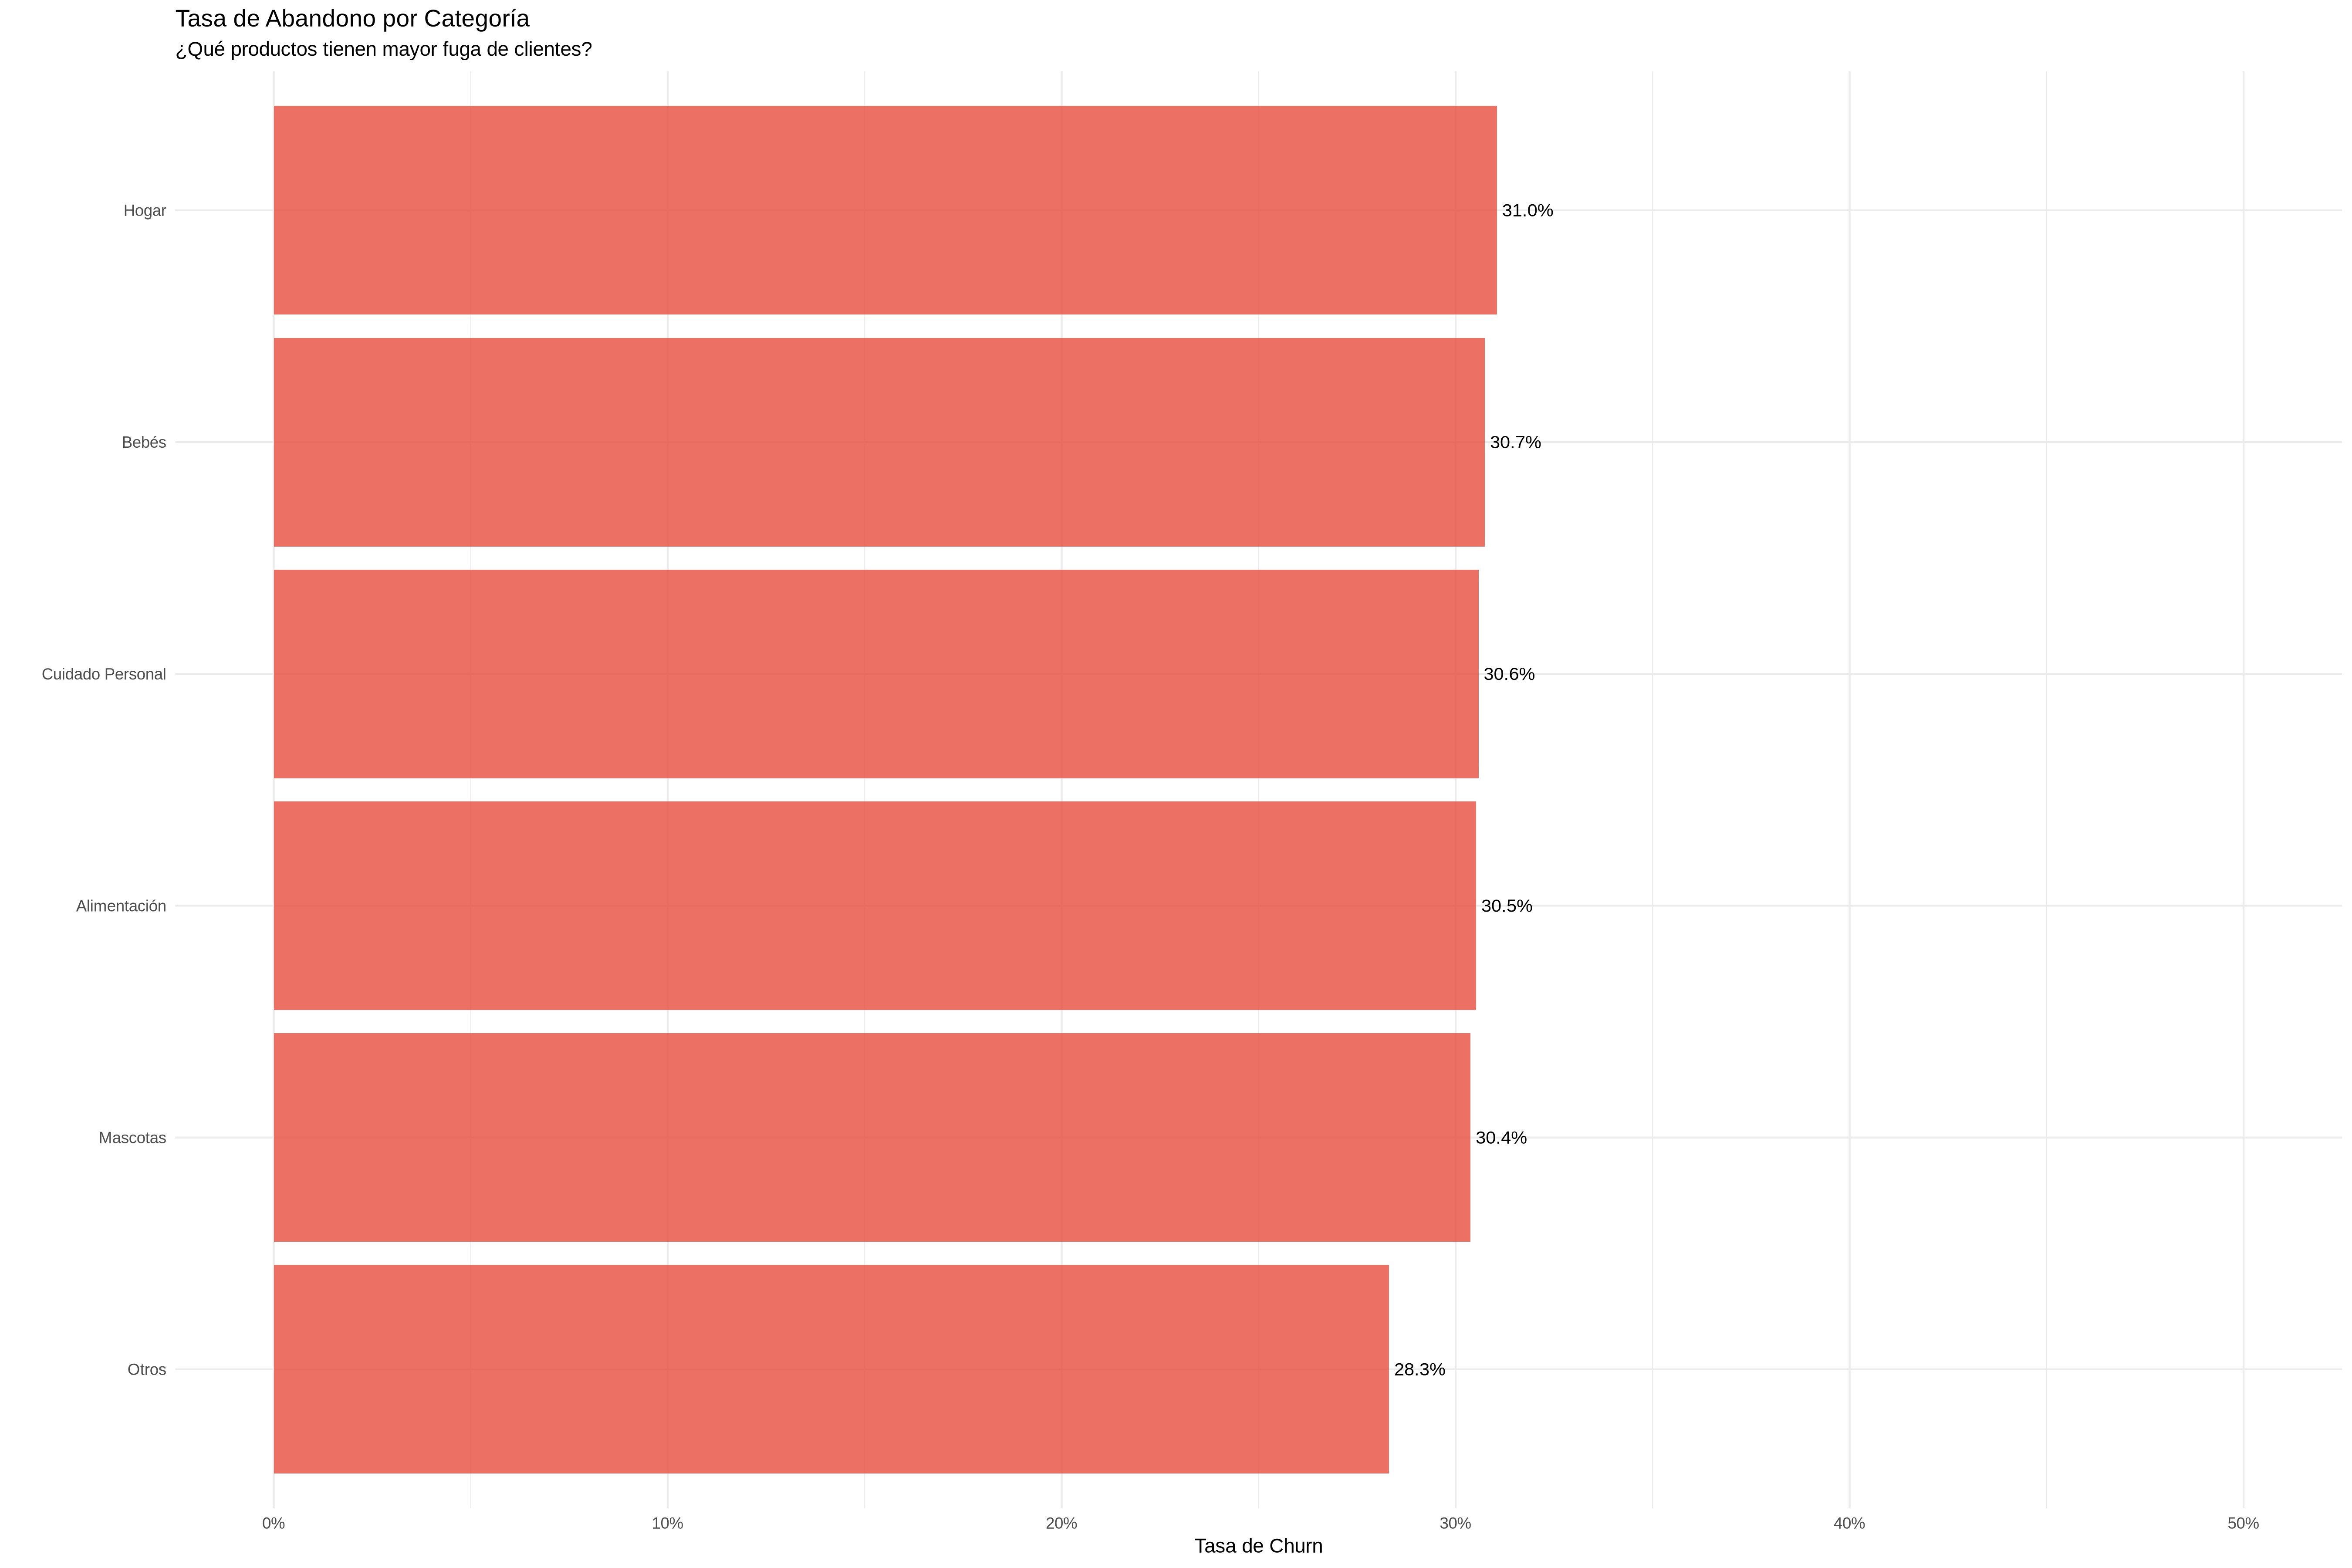

In [15]:
# --- CELDA: ANÁLISIS DEL CHURN RATE (Tasa de Abandono) ---

library(tidyverse)
library(scales) # Para formatos de porcentaje bonitos

# 1. CÁLCULO DEL CHURN RATE GLOBAL
# El PDF indica que la tasa crítica está por encima del 25%. Vamos a comprobarlo.
kpi_churn_global <- df_clean %>%
  count(bc030_estado_cliente) %>%
  mutate(
    total = sum(n),
    porcentaje = n / total,
    label = percent(porcentaje, accuracy = 0.1)
  )

print("--- KPI PRINCIPAL: Estado de la Base de Clientes ---")
print(kpi_churn_global)

# 2. VISUALIZACIÓN GLOBAL (Gráfico de Donut)
# Un gráfico simple pero efectivo para la diapositiva de "Situación Actual"
grafico_churn <- ggplot(kpi_churn_global, aes(x = 2, y = porcentaje, fill = bc030_estado_cliente)) +
  geom_bar(stat = "identity", color = "white") +
  coord_polar(theta = "y", start = 0) +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5), color = "white", fontface = "bold", size = 5) +
  scale_fill_manual(values = c("Activo" = "#2ecc71", "Inactivo" = "#e74c3c")) +
  theme_void() +
  xlim(0.5, 2.5) + # Truco para hacer el agujero del donut
  labs(title = "Distribución de Clientes Activos vs Inactivos (2024)", fill = "Estado")

print(grafico_churn)

# 3. CHURN POR CATEGORÍA DE PRODUCTO (Primer Desglose)
# ¿Hay categorías donde se pierden más clientes?
churn_por_categoria <- df_clean %>%
  group_by(bc017_categoria_principal, bc030_estado_cliente) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(bc017_categoria_principal) %>%
  mutate(pct = count / sum(count)) %>%
  filter(bc030_estado_cliente == "Inactivo") %>% # Nos quedamos solo con la tasa de abandono
  arrange(desc(pct))

print("--- Ranking de Abandono por Categoría ---")
print(churn_por_categoria)

# Visualización de Churn por Categoría
grafico_cat <- ggplot(churn_por_categoria, aes(x = reorder(bc017_categoria_principal, pct), y = pct)) +
  geom_col(fill = "#e74c3c", alpha = 0.8) +
  geom_text(aes(label = percent(pct, accuracy = 0.1)), hjust = -0.1, size = 3.5) +
  coord_flip() +
  scale_y_continuous(labels = percent_format(), limits = c(0, 0.5)) + # Escala hasta 50%
  labs(
    title = "Tasa de Abandono por Categoría",
    subtitle = "¿Qué productos tienen mayor fuga de clientes?",
    x = "", y = "Tasa de Churn"
  ) +
  theme_minimal()

print(grafico_cat)